In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
# تحميل البيانات
df = pd.read_csv('/kaggle/input/amazon-product-reviews-dataset/7817_1.csv')  # استبدل باسم الملف الخاص بك
df.columns = ['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded', 'dateUpdated', 'dimension', 
              'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'prices', 'reviews.date', 
              'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 
              'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 
              'reviews.username', 'sizes', 'upc', 'weight']  # تأكد من صحة أسماء الأعمدة


In [10]:
# تحويل التقييمات إلى تسميات
df['label'] = df['reviews.rating'].apply(lambda x: 1 if x >= 4 else 0)  # افترض أن 4 أو 5 هي إيجابية

In [11]:
# تحديد المتغيرات
X = df['reviews.text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# إعدادات نموذج التعلم العميق
vocab_size = 5000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)


In [13]:
# تحويل النصوص إلى تسلسلات
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [14]:
# تعبئة التسلسلات
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')


In [16]:
# بناء النموذج
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])


In [17]:
# تدريب النموذج
history = model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test), verbose=2)


Epoch 1/10
40/40 - 3s - 63ms/step - accuracy: 0.6672 - loss: 0.6222 - val_accuracy: 0.7031 - val_loss: 0.5652
Epoch 2/10
40/40 - 0s - 6ms/step - accuracy: 0.6954 - loss: 0.5903 - val_accuracy: 0.7000 - val_loss: 0.5594
Epoch 3/10
40/40 - 0s - 6ms/step - accuracy: 0.7267 - loss: 0.5716 - val_accuracy: 0.7156 - val_loss: 0.5474
Epoch 4/10
40/40 - 0s - 6ms/step - accuracy: 0.7416 - loss: 0.5510 - val_accuracy: 0.7188 - val_loss: 0.5371
Epoch 5/10
40/40 - 0s - 6ms/step - accuracy: 0.7627 - loss: 0.5307 - val_accuracy: 0.7094 - val_loss: 0.5307
Epoch 6/10
40/40 - 0s - 6ms/step - accuracy: 0.7784 - loss: 0.5132 - val_accuracy: 0.7188 - val_loss: 0.5260
Epoch 7/10
40/40 - 0s - 6ms/step - accuracy: 0.7901 - loss: 0.4856 - val_accuracy: 0.7031 - val_loss: 0.5210
Epoch 8/10
40/40 - 0s - 6ms/step - accuracy: 0.8089 - loss: 0.4457 - val_accuracy: 0.6938 - val_loss: 0.5086
Epoch 9/10
40/40 - 0s - 6ms/step - accuracy: 0.8152 - loss: 0.4170 - val_accuracy: 0.7156 - val_loss: 0.5041
Epoch 10/10
40/40 

In [19]:
# تقييم النموذج
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Accuracy: 0.71875

Confusion Matrix:
 [[ 81  37]
 [ 53 149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.69      0.64       118
           1       0.80      0.74      0.77       202

    accuracy                           0.72       320
   macro avg       0.70      0.71      0.71       320
weighted avg       0.73      0.72      0.72       320



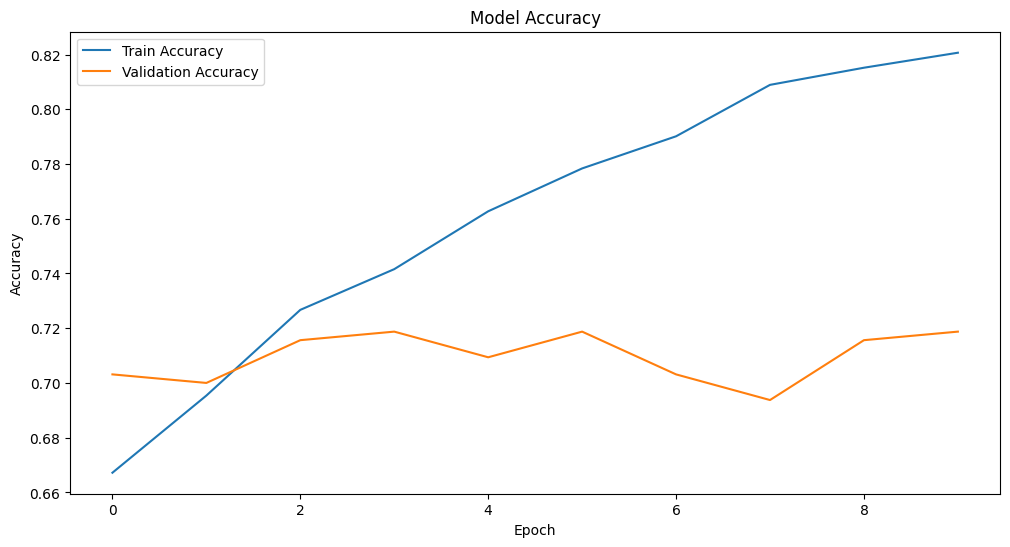

In [20]:
# رسم دقة النموذج
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


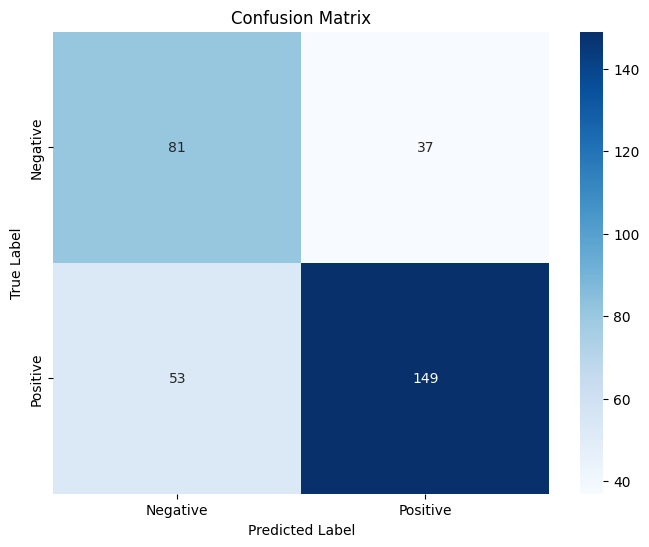

In [21]:
# رسم مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()